# Random numbers

## Objectives

* Understand the limitations of random number generators
* Know how to seed and use a random number generator

Section 4.1 and 4.2 from class book.

## A word about Magics

## Project plans

Today is project selection day! If you have not sent me your topic, I have selected one for you. 

The projects are individual!!

The final project would be

1) A final report, which contains

     An introduction
    
     A description of the problem to be solved
     
     A detail explanation of the implementation
     
     The test you performed to guarantee that the implementation was correct
     
     The results of your calculations. I do expect to see results changing the initial conditions, the parameters, etc.
     
     A small discussion on the physical meaning of the result.
     
     A section just dedicated to what you can do after this project if you would like to continue developing it.
    
2) An oral presentation. It will be a 20 min presentation of your project. This will be the last week of classes.


In [19]:
import numpy as np
import matplotlib.pyplot as plt

## Initial words

Most of what we'll be covering is "random numbers" for data science, not cryptography.

Now we will discuss how random numbers are generated in a computer. The idea is to generate a sequence of number $r_1,r_2,\cdots$ which looks random (no correlations between them) but in reality they are "pseudo random". This means that they are not obtained like those that you obtain from rolling a dice or playing lotery. 

If all the numbers in the sequence are likely to occur, they come from a uniform probability distribution. We will see later how we can obtain numbers with other distributions.

To start, let us see the first random number generator. It is based on the power residue method and it generates random numbers $0 \le r_i \le M-1$.

In [47]:
# Take the previous number number, multiply by a, add c and take the remainder

print(4%3)

# Observe that the remainder operation takes "the last part of the number", which are like the 
#"round-off" error

def lin_cong(c, a, M, r_i):
    return (a * r_i + c) % M

1


In [48]:
lin_cong(c=1, a=4, M=9, r_i=3)

4

In [49]:
ri=lin_cong(c=1, a=4, M=9, r_i=4)
print(ri)

8


In [50]:
#Observe that numbers repeat from i=9 (=M).
for i in range(12):
    ri=ri=lin_cong(c=1, a=4, M=9, r_i=ri)
    print(i,ri)

0 6
1 7
2 2
3 0
4 1
5 5
6 3
7 4
8 8
9 6
10 7
11 2


In [51]:
# This function is a generator function that yields 1 for the first time, 
# 2 second time and 3 third time 
def iterator():
    yield 1
    yield 2
    yield 3

In [52]:
for item in iterator():
    print(item)

1
2
3


In [53]:
tuple(iterator())

(1, 2, 3)

In [54]:
def lin_cong_iter(c, a, M, r_0):
    r_i = r_0

    while True:
        yield r_i
        r_i = lin_cong(c, a, M, r_i)
        if r_i == r_0:
            return

In [56]:
vals=list(lin_cong_iter(1, 4, 9, 3))
print(vals)
print(vals[::2], vals[1::2])

[3, 4, 8, 6, 7, 2, 0, 1, 5]
[3, 8, 7, 0, 5] [4, 6, 2, 1]


In [31]:
list(i / 8 for i in lin_cong_iter(1, 4, 9, 3))

[0.375, 0.5, 1.0, 0.75, 0.875, 0.25, 0.0, 0.125, 0.625]

In [57]:
#if we want random numbers in a different interval, for example between [A,B]
# we use x_i = A+(B-A)*r_i   (where r_i is normalized)
rs=np.array(list(i / 8 for i in lin_cong_iter(1, 4, 9, 3)))
A=8
B=12
print(8+(B-A)*rs)

[ 9.5 10.  12.  11.  11.5  9.   8.   8.5 10.5]


Try it out:

Set `a=57, c=1, M=256, r_0=10` (like in the book) and see what happens.

You will see that this is what we call "a bad generator".

In [58]:
vals = list(lin_cong_iter(a=57, c=1, M=256, r_0=10))
print(len(vals))

256


In [63]:
#generate 256 numbers between 0 and 255
real_rand = np.random.randint(0, 256, 256)

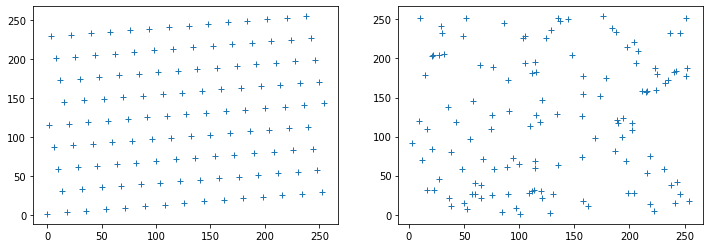

In [66]:
#You always need to check if the numbers you will be using "looks random". In a 32 bit computer
# M = 2^31. Important to know if you do simulations that require more numbers than this.
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(vals[::2], vals[1::2], "+")
axs[1].plot(real_rand[::2], real_rand[1::2], "+")
plt.show()

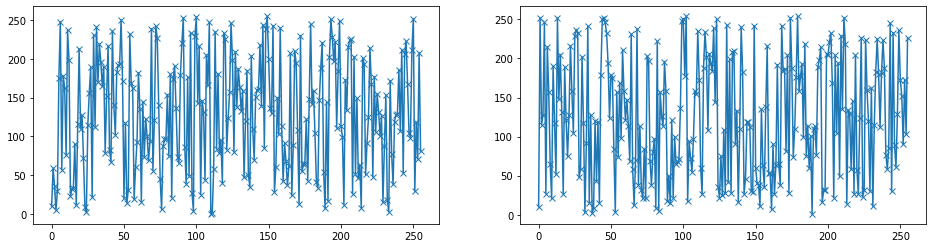

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(range(256), vals, "x-")
axs[1].plot(range(256), real_rand, "x-")
plt.show()

In reality, selecting good coefficients is an art, and people have developed a lot of intuition and practice. A good example is:

In [5]:
#Park-Miller

 
# By choosing the values below, the period is 2,147,483,645
class rnd:
    def __init__(self, s = 1234):
        self.seed = s
    def gen(self):
        self.seed = (16807*self.seed) % (2**31-1)
        return self.seed

a=rnd()
for i in range(10):
    print(a.gen())

20739838
682106452
895431078
2092213417
933663541
420124958
113937770
1544170913
540660796
882687915


## Python random numbers

Since the book mentions Python's random numbers, let's look at that first. Once you know how they work, it really doesn't matter which library you use except for speed and simplicity (and then go with Numpy, of course).

In [1]:
import random

As discussed one needs to start the sequence of random number generation by using an initial value which is usually called the seed-number.

In [2]:
random.seed(42)

In [3]:
for i in range(10):
    print(random.randint(0, 256))

57
12
140
125
114
71
52
44
216
16


the seed value can be int, float, str, bytes, or bytearray.

In [4]:
random.seed(0.1)

In [5]:
for i in range(10):
    print(random.randint(0, 256))

123
70
220
217
118
226
210
201
243
66


In [13]:
# now choosing one from a list

l = [0.5, 0.3, 5., 3.4,1,2,3,'House','MyCase']
random.choice(l)



'MyCase'

## Numpy random numbers

Let's try the same with Numpy:

In [70]:
np.random.seed(42)

In [71]:
np.random.randint(0, 256, 10)

array([102, 179,  92,  14, 106,  71, 188,  20, 102, 121])

In [72]:
#Randomstate from different probability distributions
state1 = np.random.RandomState(42)

In [77]:
np.random.seed(1234)
print(np.random.uniform(0, 10, 5))
r = np.random.RandomState(1234)
print(r.uniform(0, 10, 5))

[1.9151945  6.22108771 4.37727739 7.85358584 7.79975808]
[1.9151945  6.22108771 4.37727739 7.85358584 7.79975808]


In [78]:
state1.randint(0, 256)

102

In [79]:
np.random.seed(42)
rsamp = np.random.rand(1000)

In [80]:
rsamp[:100]

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914,
       0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
       0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041,
       0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
       0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249,
       0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
       0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446,
       0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998,
       0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033,
       0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451,
       0.54269608, 0.14092422, 0.80219698, 0.07455064, 0.98688694,
       0.77224477, 0.19871568, 0.00552212, 0.81546143, 0.70685

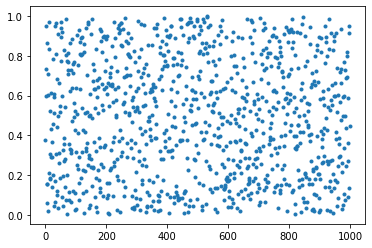

In [81]:
plt.plot(rsamp, ".")

A simple test to check uniformity is to evaluate the kth momentum of the distribution;
$$
\langle x^k \rangle = \frac{1}{N} \sum_{i=1}^N x_i^k
$$
If the numbers are distributed uniformly, it follows that

$$
\frac{1}{N} \sum_{i=1}^N x_i^k \approx \int_0^1 dx x^k P(x) \approx \frac{1}{k+1} + O\left(\frac{1}{\sqrt{N}}\right)
$$

In [82]:
N = len(rsamp)
moment1 = 1 / N * np.sum(rsamp ** 1)
moment2 = 1 / N * np.sum(rsamp ** 2)
moment3 = 1 / N * np.sum(rsamp ** 3)
print(f"moment 1: {moment1} == {1/(1+1)} +/- {1/np.sqrt(N)}")
print(f"moment 2: {moment2} == {1/(1+2)} +/- {1/np.sqrt(N)}")
print(f"moment 3: {moment3} == {1/(1+3)} +/- {1/np.sqrt(N)}")

moment 1: 0.4902565533201336 == 0.5 +/- 0.03162277660168379
moment 2: 0.32561038208072784 == 0.3333333333333333 +/- 0.03162277660168379
moment 3: 0.24419564872034066 == 0.25 +/- 0.03162277660168379


Another method to check the uniformity is to determinate the near-neighbor correlation as
$$
C(k) = \frac{1}{N} \sum_{i=1}^N x_i x_{i+k}
$$
If the numbers are distributed uniformly, you should get that
$$
\sum_{i=1}^N x_i x_{i+k} \approx \int_0^1 dx \int_0^1 dy x y P(x,y) = \frac{1}{4}
$$

In [89]:
#shift of numbers by -2
np.roll(np.arange(10), -2)

array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1])

In [84]:
1 / N * np.sum(rsamp * np.roll(rsamp, 1))

0.24342288997134198

In [85]:
1 / N * np.sum(rsamp * np.roll(rsamp, 2))

0.23859331190762423

In [86]:
1 / N * np.sum(rsamp * np.roll(rsamp, 3))

0.23911773041052464

In [87]:
1 / N * np.sum(rsamp * np.roll(rsamp, 4))

0.24079646978602764

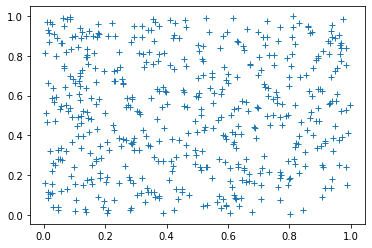

In [90]:
fig, ax = plt.subplots()
ax.plot(rsamp[::2], rsamp[1::2], "+")
plt.show()

In [15]:
# From a Gaussian distribution
random.gauss(mu = 0, sigma = 1)

-0.8971212536748581

From an exponential distribution as

$$
f(x,\lambda) = 
  \left\{ \begin{array}{ll}
 \left(\lambda e^{-\lambda x} \right) & if x \ge 0\\
 0 & if x<0 .\end{array} \right.
$$

Useful in many different applications, just a small example: radioactive particle decay distribution

In [17]:
random.expovariate(0.5)

1.4112539372708524

A peculiar case is np.random.rand

which can be used as np.random.rand(d0, d1,…, dn)

This submodule of NumPy generates random numbers and arrays of different shapes filled with uniformly distributed random numbers in the half-open interval $[0,1)$. If not given an argument to this sub-module, it returns a random number in the interval [0, 1). If given one argument, a one-dimensional NumPy array is returned. If given more than one argument, a multi-dimensional arrays is returned.

In [26]:
print(np.random.rand())

print(np.random.rand(3))

print(np.random.rand(4, 2))


0.5793340373567394
[0.61225031 0.04093958 0.03801203]
[[0.23162943 0.29843968]
 [0.08484251 0.17231598]
 [0.61697513 0.15059893]
 [0.62355471 0.65942783]]


# A bit deeper in random numbers. Using bitwise operations (advance)

I guess you are familiar with binary representation of numbers

1 = 0001

2 = 0010

3 = 0011

4 = 0100

.
.


Bitwise operations

*OR*

1001 (9) OR 0101 (5) = 1101 (13)

In python:  9 | 5



In [8]:
9 | 5

13

In [9]:
# AND

#  1001 AND 0101  = 0001 (1)

9&5

1

In [10]:
# XOR

# 1001 XOR 0101  = 1100 (12)

9 ^ 5

12

In [11]:
# Left shift and righ shift

# 1001 left shifted 0010
# 1001 right shited 0100

print(9 << 1)
print(9 >> 1)

18
4


Now, it is also useful to be familiar with the hexadecimal representation of numbers

Hexadecimal (or hex) is a base 16 system used to simplify how binary is represented. 
A hex digit can be any of the following 16 digits: 0 1 2 3 4 5 6 7 8 9 A B C D E F

Such that

```
Denary	Binary	Hexadecimal
0	0000	0
1	0001	1
2	0010	2
3	0011	3
4	0100	4
5	0101	5
6	0110	6
7	0111	7
8	1000	8
9	1001	9
10	1010	A
11	1011	B
12	1100	C
13	1101	D
14	1110	E
15	1111	F
```

In the computer, any number starting from “0x” (zero-x) is represented in hexadecimal. For example:

```
0x0f = 15
0x1f = 31
0xff = 255
0xffff = 216-1 = 65535 0xffffffff = 232-1 = 4294967295
```

This happens by following process (using the binary as intermediate step). Let us take the Hexadecimal number 5C 

The easiest method is  5 = 0101 and C = 1100

Then we put both together  01011100 = 0x128 + 1x64 + 0x32 + 1x16 + 1x8 + 1x4 + 0x2 + 0x1 = 92


Therefore, to create random numbers using bitwise operations, it is just to create XORSHIFT

In [14]:
class rnd:
    def __init__(self, s = 1234):
        self.seed = s
    def gen(self):
        self.seed = self.seed ^ (self.seed >> 21) 
        self.seed = self.seed ^ (self.seed << 35) 
        self.seed = self.seed ^ (self.seed >> 4) 
        return (self.seed & 0xffffffff)

myrand = rnd()
for i in range(30):
    print(myrand.gen())

1183
288731222
1003807570
2737978148
560314590
860181832
2874940191
481057057
4263710680
1133242283
547512940
4006948063
4226762643
2004189768
503010284
507143987
27952958
3387665216
2010395615
1429274087
2792808250
3680765737
2518399469
3027254280
3688354865
2815940929
4192867384
3084773704
2037462073
1324109069


In [16]:
# ANother method
# MWC method

# with a period of around 1.8×1019.

 
class rnd:
    def __init__(self, s = 1234):
        self.seed = s
    def gen(self): 
        self.seed = (self.seed & 0xffffffff)*4294957665 + (self.seed>>32) 
        return (self.seed & 0xffffffff) 
    
myrand = rnd()
for i in range(30):
    print(myrand.gen())

4283082642
2791954211
1467339856
1284198655
2855902741
1055460788
3900636741
2101943962
2259196020
2089392165
1245031599
2738747943
4052721806
3637814263
2311779237
4002437023
2172287140
3490681524
127550417
3413254226
755783109
140723217
2660144024
4068515693
1772140183
491471105
1467884147
2331588678
26346525
1991271639


In [18]:
# We can even produce one with a much larger period by combining the two previous ones

class rnd:
    def __init__(self, s1 = 1234, s2 = 5678):
        self.s1 = s1 
        self.s2 = s2
    def gen(self):
        self.s1 = self.s1 ^ (self.s1 >> 17) 
        self.s1 = self.s1 ^ (self.s1 << 31) 
        self.s1 = self.s1 ^ (self.s1 >> 8)
        self.s2 = (self.s2 & 0xffffffff)*4294957665 + (self.s2>>32)
        return ((self.s1 ^ self.s2) & 0xffffffff)
myrand=rnd()
for i in range(30):
    print(myrand.gen())

2512230328
3081706301
1968151581
3266289562
2076928125
1738967221
2657722299
1153926827
738420122
2921085993
535382698
3091065643
212603007
3248854770
1141670007
2054285484
4158627673
122206444
3241057408
1795153049
585288956
2781052095
2858048882
1432817399
903030110
1611091716
2759304668
3508508790
1416080346
1255405048
